In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
from scipy import stats
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

In [4]:
## color blind colors
cc = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}

my_colors = {'bb': cc["blue"], 'anc': cc["green"], 'bn50': cc["red"], 'bn5': cc["orange"], 'A00': cc["purple"],
             "M00": cc["pink"], "iso": cc["brown"], "bleach": "#17BECF",
            0: "#e5e5e5ff", 1: "#999999ff", 15: "#1873ccff"}


In [40]:
# read in data to panda
InCov="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Coverage/fromTrimmedReads/Reads_and_Coverage_fromPython.pkl"

InPi_default="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/O_output/PiDivGrenedalf_df_overviewwindowLength_singleData_20241024.pkl"
InPi_Poop = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/PiDiv_df_overview_singleData_20240724.pkl"

outPath = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/output/"
outPlots = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/O_plots/"

chromosomes=["NC_003279.8","NC_003280.10","NC_003281.10","NC_003282.8","NC_003283.11","NC_003284.9","NC_001328.1"]
#filesGen

In [41]:

## get all the data
df_PiDefault = pd.read_pickle(InPi_default)
df_PiDefault["ID"] = df_PiDefault.index


## get the popoolation data
df_PiPoop = pd.read_pickle(InPi_Poop)

#df_cov=pd.read_csv(InCov,delimiter="\t", na_values="na")
df_cov=pd.read_pickle(InCov)

df_cov = df_cov.reset_index()
df_cov.rename(columns={'index': 'ID'}, inplace=True)
df_cov = df_cov[["ID","institution","treatment","replicate","week","coverage"]]

## for the one from mapping
#df_cov.rename(columns={'sample': 'ID', 'mean': 'coverage'}, inplace=True)
#df_cov = df_cov[['ID','coverage']]
print(df_cov[df_cov["coverage"]<35].shape[0])
print(df_cov[df_cov["coverage"]<=50].shape[0])
df_PiPoop

8
14


,ID,institution,treatment,inst_treat,week,rep,div_mean,div_std,divWeight_mean,divWeight_std,NumNaNWindows
div_VU_bn5_15_2,VU_bn5_15_2,VU,bn5,VU_bn5,15,2,0.001644,0.003140,0.001630,0.003092,3.0
div_VU_bb_15_3,VU_bb_15_3,VU,bb,VU_bb,15,3,0.001714,0.003113,0.001700,0.003064,2.0
div_RUG_bb_15_5,RUG_bb_15_5,RUG,bb,RUG_bb,15,5,0.001747,0.003159,0.001736,0.003119,1.0
div_NIOO_bb_15_4,NIOO_bb_15_4,NIOO,bb,NIOO_bb,15,4,0.001727,0.003063,0.001716,0.003024,1.0
div_WUR_bb_15_3,WUR_bb_15_3,WUR,bb,WUR_bb,15,3,0.001683,0.003163,0.001673,0.003128,1.0
div_RUG_bb_1_5,RUG_bb_1_5,RUG,bb,RUG_bb,1,5,0.001703,0.003163,0.001691,0.003122,1.0
div_RUG_bb_1_2,RUG_bb_1_2,RUG,bb,RUG_bb,1,2,0.001718,0.003187,0.001705,0.003144,1.0
div_UVA_anc_0_3,UVA_anc_0_3,UVA,anc,UVA_anc,0,3,0.001751,0.003258,0.001738,0.003215,1.0
div_VU_bb_15_5,VU_bb_15_5,VU,bb,VU_bb,15,5,0.001737,0.003156,0.001722,0.003104,1.0
div_RUG_bb_15_3,RUG_bb_15_3,RUG,bb,RUG_bb,15,3,0.001738,0.003213,0.001724,0.003162,3.0


In [42]:
## merge the data frames
df_merge_all = pd.merge(df_PiDefault, df_cov, on="ID", how="outer")
df_merge_all_wPoop = pd.merge(df_merge_all,df_PiPoop, on="ID", how="outer")
df_merge_all_wPoop

,institute,treatment_x,week_x,replicate_x,emtpy,total.invariant,total.passed,sample.missing,sample.numeric,sample.passed,pi,watterson,tajimasD,ID,institution_x,treatment_y,replicate_y,week_y,coverage,institution_y,treatment,inst_treat,week,rep,div_mean,div_std,divWeight_mean,divWeight_std,NumNaNWindows
0,Gent,bb,15,1,440455,91417939,7407712,0,0,7407712,0.005001,0.017879,-6.433198,Gent_bb_15_1,Gent,bb,1,15,111.064662,Gent,bb,Gent_bb,15,1,0.001639,0.003092,0.001614,0.002987,26.0
1,Gent,bb,15,2,412565,89602810,9281161,0,0,9281161,0.005524,0.021795,-6.667702,Gent_bb_15_2,Gent,bb,2,15,123.782224,Gent,bb,Gent_bb,15,2,0.001735,0.003182,0.001723,0.003142,1.0
2,Gent,bb,15,3,420987,91433572,7408192,0,0,7408192,0.005280,0.018260,-6.348667,Gent_bb_15_3,Gent,bb,3,15,103.134254,Gent,bb,Gent_bb,15,3,0.001739,0.003197,0.001727,0.003155,1.0
3,Gent,bb,15,4,432709,91280992,7555589,0,0,7555589,0.004994,0.018139,-6.472048,Gent_bb_15_4,Gent,bb,4,15,112.559776,Gent,bb,Gent_bb,15,4,0.001738,0.003200,0.001725,0.003157,1.0
4,Gent,bb,15,5,450768,90246231,8597065,0,0,8597065,0.005646,0.020819,-6.509014,Gent_bb_15_5,Gent,bb,5,15,108.856907,Gent,bb,Gent_bb,15,5,0.001735,0.003176,0.001722,0.003133,1.0
5,Gent,bb,1,1,253179,89739341,9458417,0,0,9458417,0.003999,0.019492,-7.098827,Gent_bb_1_1,Gent,bb,1,1,277.081712,Gent,bb,Gent_bb,1,1,0.001607,0.003011,0.001592,0.002944,23.0
6,Gent,bb,1,2,352414,95438748,3535720,0,0,3535720,0.003037,0.008386,-5.696441,Gent_bb_1_2,Gent,bb,2,1,150.633462,Gent,bb,Gent_bb,1,2,0.001707,0.003202,0.001696,0.003167,1.0
7,Gent,bb,1,3,290611,93466963,5638676,0,0,5638676,0.003386,0.012353,-6.483350,Gent_bb_1_3,Gent,bb,3,1,210.354344,Gent,bb,Gent_bb,1,3,0.001704,0.003182,0.001692,0.003142,1.0
8,Gent,bb,1,4,288072,92465782,6630785,0,0,6630785,0.003572,0.014242,-6.691427,Gent_bb_1_4,Gent,bb,4,1,228.824043,Gent,bb,Gent_bb,1,4,0.001722,0.003199,0.001709,0.003154,1.0
9,Gent,iso,15,1,334751,91696551,7165470,0,0,7165470,0.004345,0.016478,-6.576082,Gent_iso_15_1,Gent,iso,1,15,138.829437,Gent,iso,Gent_iso,15,1,0.001712,0.003184,0.001698,0.003139,3.0


<Axes: xlabel='coverage', ylabel='pi'>

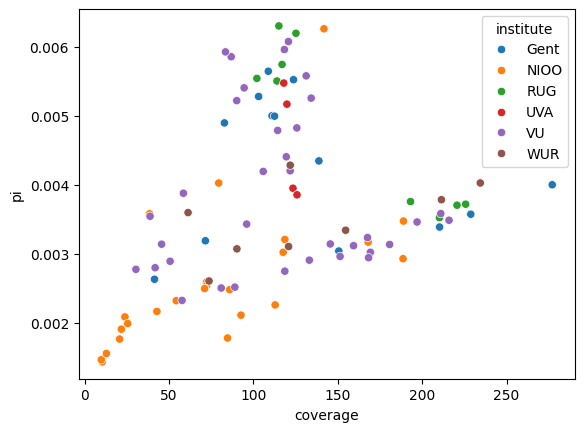

In [43]:
## how does pi depend on coverage
sns.scatterplot(data=df_merge_all, x="coverage", y="pi", hue="institute")

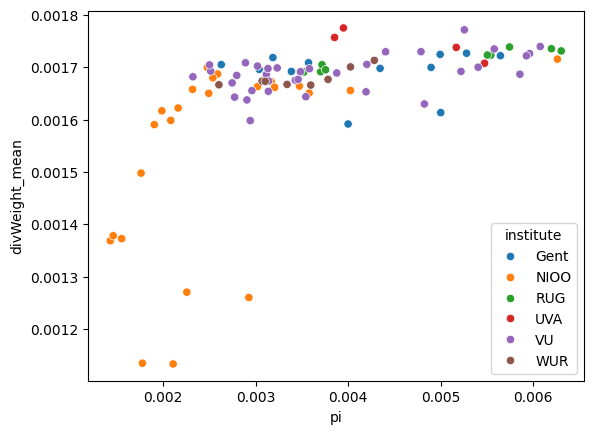

In [44]:
## how do the all pi from popoolation go together with the grenedalf
ax = sns.scatterplot(data=df_merge_all_wPoop, x="pi", y="divWeight_mean", hue="institute")
#ax.set_ylim((0.0015, 0.0018))